In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
df = pd.read_csv('./cleaned.csv', index_col=0)
df

,Variable,Time,Value
0,"Compensation rate, total economy",2012,3.323942e+04
1,"Compensation rate, total economy",2013,3.431918e+04
2,"Compensation rate, total economy",2014,3.464974e+04
3,"Compensation rate, total economy",2015,3.494091e+04
4,"Compensation rate, total economy",2016,3.600354e+04
...,...,...,...
124,Total population,2018,6.643600e+07
125,Total population,2019,6.683300e+07
126,Total population,2020,6.722293e+07
127,Total population,2021,6.758545e+07


In [4]:
df[df['Variable']== 'Hours worked per worker, total economy']

,Variable,Time,Value
99,"Hours worked per worker, total economy",2012,1659.560860
100,"Hours worked per worker, total economy",2013,1670.522689
101,"Hours worked per worker, total economy",2014,1677.016543
102,"Hours worked per worker, total economy",2015,1674.038611
103,"Hours worked per worker, total economy",2016,1672.275820
104,"Hours worked per worker, total economy",2017,1673.545712
105,"Hours worked per worker, total economy",2018,1667.749645
106,"Hours worked per worker, total economy",2019,1672.548630


In [5]:
grouped_df = df.groupby(['Time', 'Variable'])['Value'].sum().reset_index()
pivot_df = grouped_df.pivot(index='Variable', columns='Time', values='Value')
pivot_df.head(3)

Time,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Variable,,,,,,,,,,,
Balance of primary income (balance of payments basis),-1.778100e+10,-3.634300e+10,-3.801100e+10,-4.428800e+10,-4.842900e+10,-2.561200e+10,-2.787800e+10,-3.731300e+10,-4.645700e+10,-4.189200e+10,-4.189200e+10
Balance of secondary income (balance of payments basis),-2.089700e+10,-2.574000e+10,-2.394400e+10,-2.387500e+10,-2.384800e+10,-2.246200e+10,-2.548800e+10,-2.749500e+10,-3.383600e+10,-3.655600e+10,-3.655600e+10
"Compensation rate, total economy",3.323942e+04,3.431918e+04,3.464974e+04,3.494091e+04,3.600354e+04,3.709870e+04,3.805776e+04,3.956683e+04,4.022033e+04,3.920362e+04,4.085479e+04


In [6]:
df_filled = pivot_df.apply(lambda row: row.fillna(row.mean()), axis=1)
df_filled.isna().sum()

Time
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [7]:
df_filled[2022]

Variable
Balance of primary income (balance of payments basis)     -4.189200e+10
Balance of secondary income (balance of payments basis)   -3.655600e+10
Compensation rate, total economy                           4.085479e+04
Current account balance                                   -7.621410e+10
Gross domestic product per capita, volume                  3.074796e+04
Hours worked per worker, total economy                     1.670907e+03
Labour force                                               3.426731e+07
Total employment (labour force survey basis)               3.212690e+07
Total population                                           6.790412e+07
Total self-employed                                        3.583117e+06
Unemployment rate                                          6.246222e+00
Wage rate, total economy                                   3.329993e+04
Name: 2022, dtype: float64

In [8]:
df_uk = df_filled.T
df_uk[['Unemployment rate','Hours worked per worker, total economy']]

Variable,Unemployment rate,"Hours worked per worker, total economy"
Time,,
2012,7.967646,1659.560860
2013,7.608269,1670.522689
2014,6.179977,1677.016543
2015,5.384807,1674.038611
2016,4.893376,1672.275820
2017,4.402347,1673.545712
2018,4.080516,1667.749645
2019,3.827969,1672.548630
2020,4.640059,1670.907314


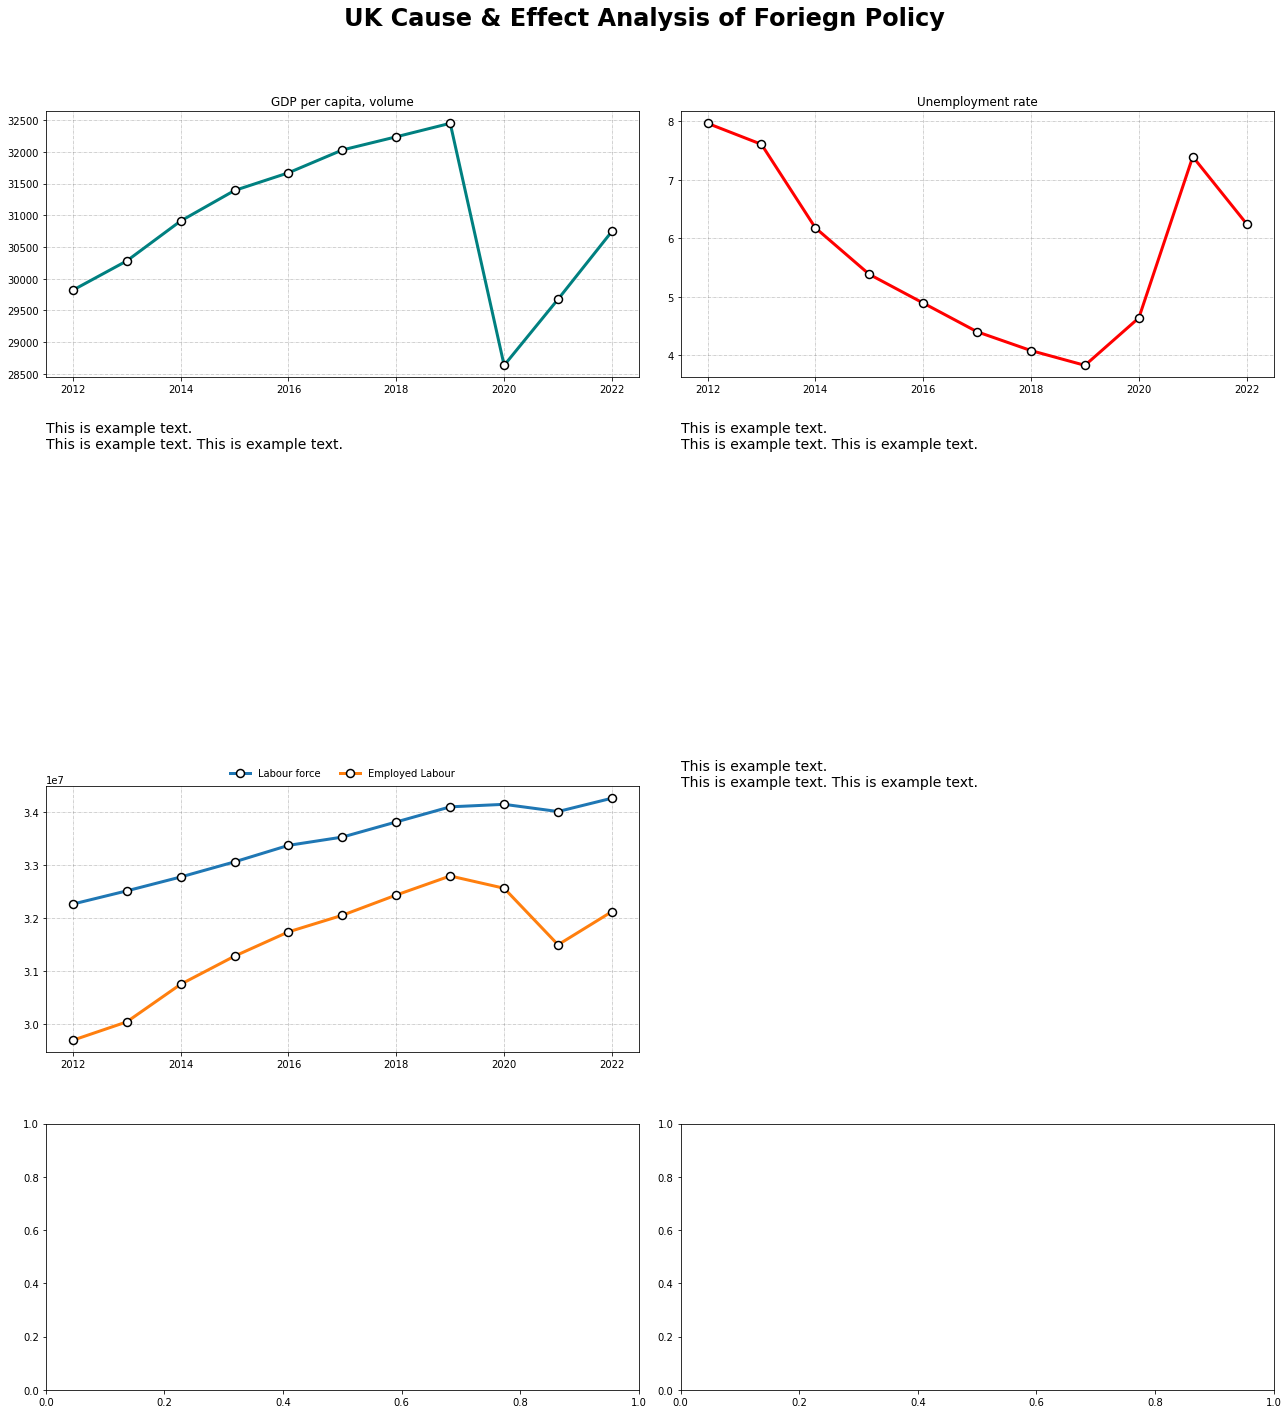

In [217]:
fig, ax = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('UK Cause & Effect Analysis of Foriegn Policy',
             fontsize=24,
             fontweight='bold')

plot1 = df_uk[['Gross domestic product per capita, volume']]
plot2 = df_uk[['Unemployment rate']]
plot3 = df_uk[['Labour force', 'Total employment (labour force survey basis)']]


def line_plotter(row, column, data, title='', color='', legend=False):
       
        if legend == True:
            ax[row, column].plot(data, label=title, 
              linewidth=3,
              marker='o', markersize=8, 
              markerfacecolor='white',
              markeredgecolor='black',
              markeredgewidth=1.5)
            ax[row, column].legend(labels=['Labour force', 'Employed Labour'],
                                   loc='upper center', 
                                   frameon=False,
                                   ncols=2,
                                   bbox_to_anchor=(0.5, 1.1))
            ax[row, column].grid(True, 
              linestyle='-.', 
              linewidth=0.5, 
              alpha=0.7, 
              color='gray')
        else:
            ax[row, column].plot(data, 
              linewidth=3, color=color,
              marker='o', markersize=8, 
              markerfacecolor='white',
              markeredgecolor='black',
              markeredgewidth=1.5)
            ax[row, column].set_title(title)
            ax[row, column].grid(True, 
              linestyle='-.', 
              linewidth=0.5, 
              alpha=0.7, 
              color='gray') 
            

def expl_text_adder(row=1, column=1, text=''):
        """This function expl_text_adders the sublot 
        area to input explanation of the plot"""
        ax[row, column].text(0, 1, text, fontsize=14, color='black')
        ax[row, column].tick_params(length=0, width=0)
        ax[row, column].set_facecolor('none')
        ax[row, column].set_xticklabels([])
        ax[row, column].set_yticklabels([])
        ax[row, column].spines['top'].set_visible(False)
        ax[row, column].spines['bottom'].set_visible(False)
        ax[row, column].spines['left'].set_visible(False)
        ax[row, column].spines['right'].set_visible(False)


explanation_text = '\nThis is example text.\nThis is example text. This is example text.'

line_plotter(0, 0, plot1, 'GDP per capita, volume','teal', legend=False)
line_plotter(0, 1, plot2, 'Unemployment rate', 'red', legend=False)
line_plotter(2, 0, plot3, 'Total Labour force Vs. Employed', legend=True)

expl_text_adder(1, 0, text=explanation_text)
expl_text_adder(1, 1, text=explanation_text)
expl_text_adder(2, 1, text=explanation_text)


plt.subplots_adjust(
                left=0.1, 
                right=0.9, 
                top=1.0, 
                bottom=0.2, 
                wspace=0.1, 
                hspace=0.4)

# plt.imshow(bg_image, extent=(0, 100, 0, 100),
#            aspect='auto', alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
